#### Importing Libraries

In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score,roc_curve, confusion_matrix, roc_auc_score, classification_report, precision_score, recall_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from skimpy import skim
import warnings
warnings.filterwarnings("ignore")

#### Loading the datasets

In [21]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### Basic EDA

In [22]:
print(train.shape)
print(train.columns.values)
print(test.shape)
print(test.columns.values)
print(train.dtypes)

(614, 13)
['Loan_ID' 'Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Property_Area' 'Loan_Status']
(367, 12)
['Loan_ID' 'Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Property_Area']
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


#### Exploratory Data Analysis

#### Univariate Analysis

#### Target variables

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


<AxesSubplot:>

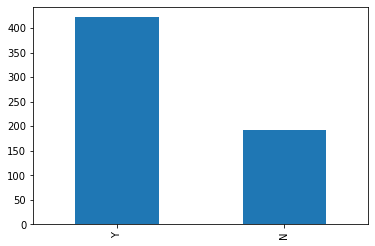

In [4]:
# We will look at the count of loans approved and rejected in the train datasets
print(train['Loan_Status'].value_counts(normalize=True))
train['Loan_Status'].value_counts().plot.bar()
# 69% of the loans were approved and 31% rejected

#### Independent Variable (Categorial)

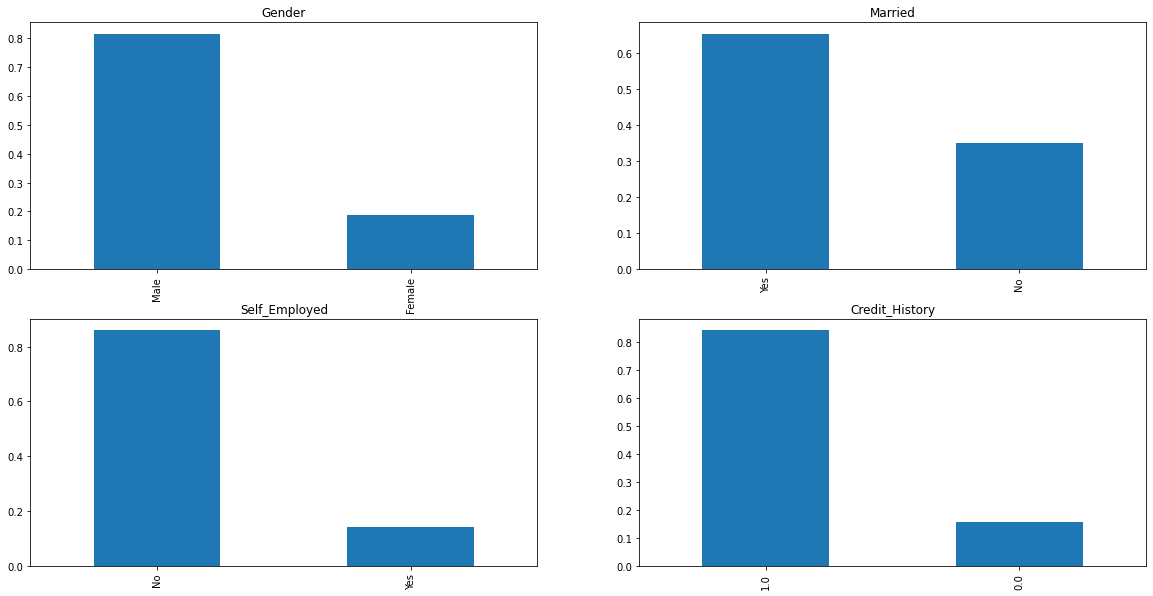

In [6]:
lists = ['Gender','Married','Self_Employed','Credit_History']
plt.figure(1)
for i in range(len(lists)):
    plt.subplot(2,2,i+1)
    train[lists[i]].value_counts(normalize=True).plot.bar(figsize=(20,10),title=lists[i])

plt.savefig('eda_for_independent_categories')    
plt.show()

#### From the plots above, we see that males are 80%, people married are 60%, over 90% are self_employed and over 85% have good credit history

#### Independent Variable (Ordinal)

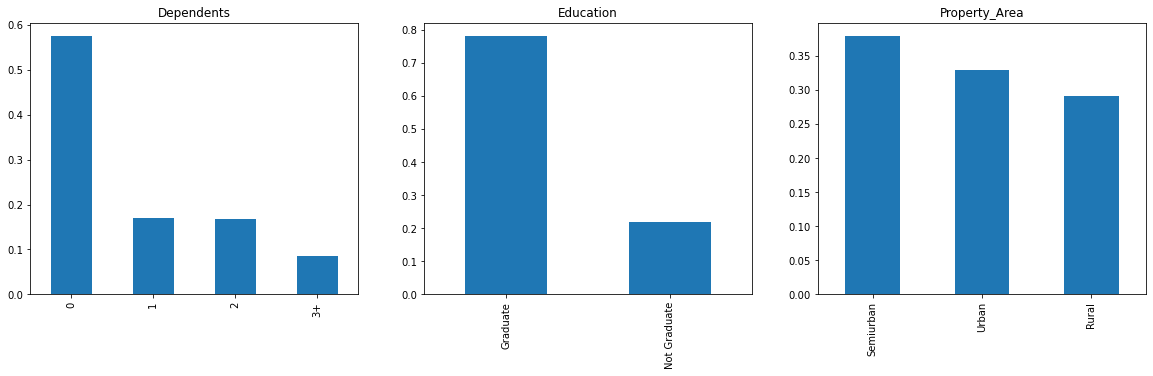

In [7]:
ordinal = ['Dependents','Education','Property_Area']
plt.figure(1)
for i in range(len(ordinal)):
    plt.subplot(1,3,i+1)
    train[ordinal[i]].value_counts(normalize=True).plot.bar(figsize=(20,5),title=ordinal[i])

plt.show()

#### From the plots above, we see that most don't have dependents, over 80% are graduates, most people are from semiurban

#### Independent variable (Numerical)

#### We will use distribution plot to see if the Applicant income is normally distributed and box plots to check for outliers

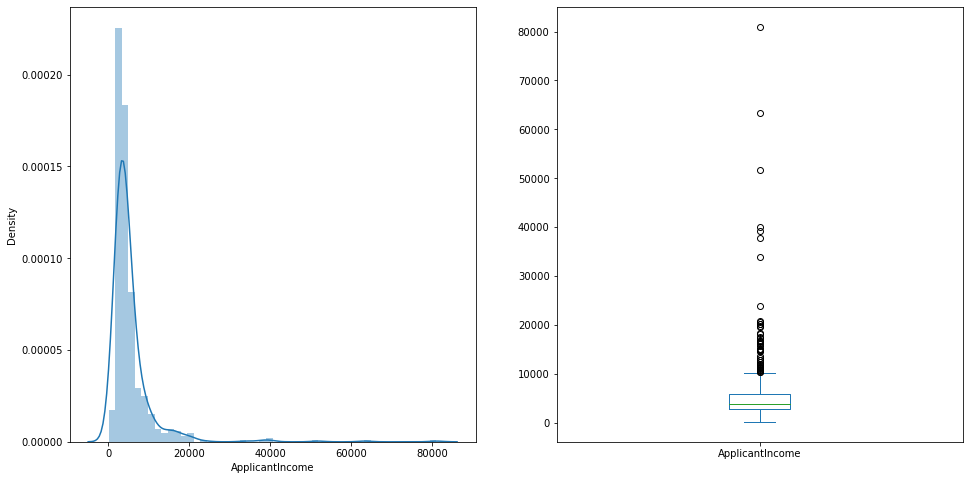

In [8]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,8))
plt.savefig('boxplots')
plt.show()

#### From the two plots above, we see that Applicant income isn't normally distributed and and there are lots of outliers in the data which could affect our machine learning models. 

Text(0.5, 0.98, '')

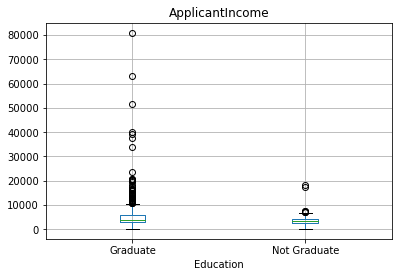

In [11]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

#### We can observe that Graduate has more outliers and this infers that they earn far higher than Graduates

#### We will use distribution plot to see if repeat the same for CoApplicant income

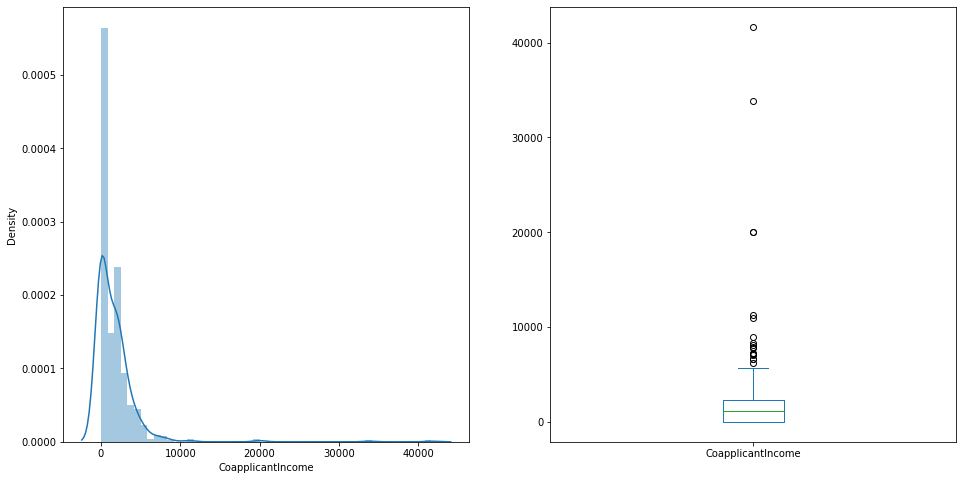

In [12]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,8))
plt.show()

#### From the two plots above, we see that CoApplicant income isn't normally distributed too and has several outliers

#### We will repeat the same for Loan Amount 

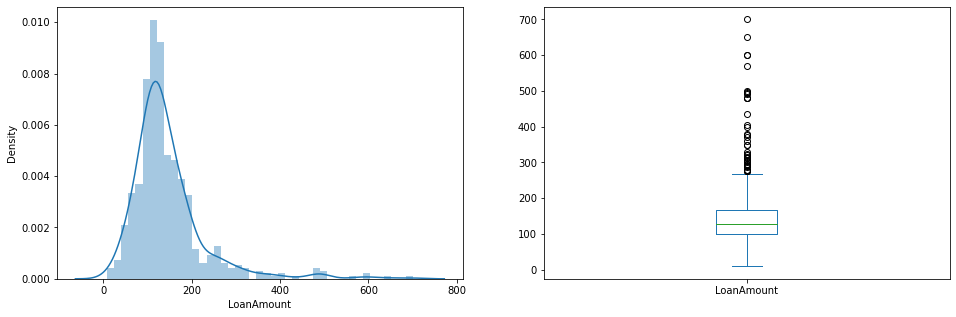

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(1)
df = train['LoanAmount'].dropna()
plt.subplot(121)
sns.distplot(df)
# plt.title('Distribution of Loan_Amount')
plt.subplot(122)
df.plot.box(figsize=(16,5))
# plt.title('BoxPlot Loan_Amount')
plt.show()
plt.savefig('distribution_plot')

#### From the two plots above, we see a lot of outliers but the data is fairly distributed 

#### Bivariate Analysis

In [14]:
print('''
Let's recall some of our hypothesis generated earlier:
- Applicants with high income should have more chances of loan approval
- Applicants who have repaid their previous debt should have higher chances
- Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
- The lesser the monthly interest to be repaid, the higher the chances of loan approval
''')


Let's recall some of our hypothesis generated earlier:
- Applicants with high income should have more chances of loan approval
- Applicants who have repaid their previous debt should have higher chances
- Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
- The lesser the monthly interest to be repaid, the higher the chances of loan approval



#### Categorical Independent Variable vs Target Variable

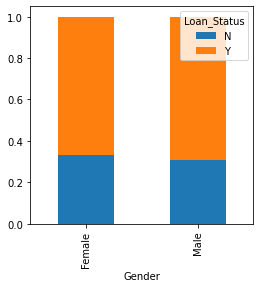

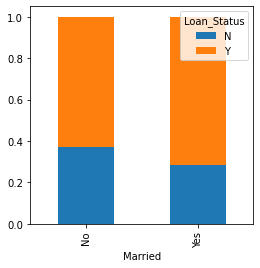

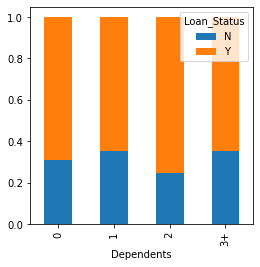

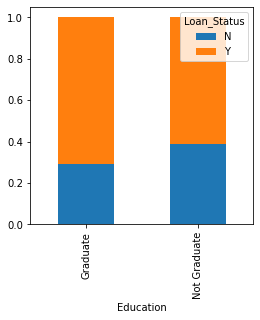

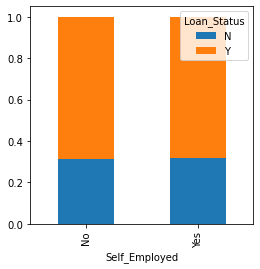

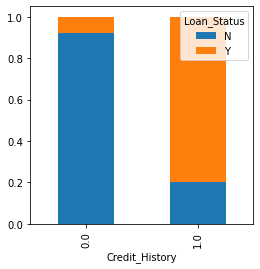

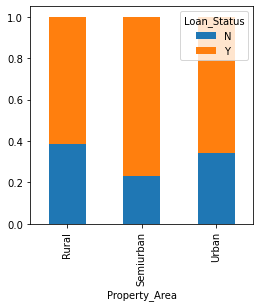

In [19]:
idv_tv = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
for idv in range(len(idv_tv)):
    new = pd.crosstab(train[idv_tv[idv]],train['Loan_Status'])
    new.div(new.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

#### From the plots of categorical variables vs target variables, we observe the following
#### 1. Proportion of male & females is close for approved & unapproved loans
#### 2. Proportion of married is higher for approved loans
#### 3. Applicants with 2 dependents have higher approved loans
#### 4. Nothing significant was observed in the Self_Employed vs Loan_Status plot
#### 5. People with 1.0 credit history have higher chances of getting loans
#### 6. People living in semi-urban areas have higher chances of getting loans

#### Numerical Independent Variable vs Target Variable

<AxesSubplot:xlabel='Loan_Status'>

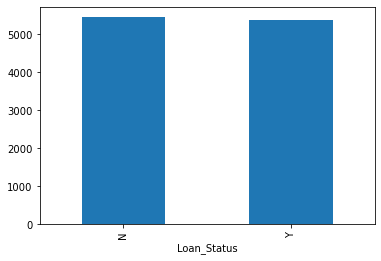

In [20]:
# We will obtain mean of income of people that got loan vs those that didn't get
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

#### No much difference can be noticed so we section the income to ranges

In [21]:
bins = [0,3000,10000,20000,81000]
groups = ['Low','Average','High','Very High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=groups)

Text(0, 0.5, 'Percentage')

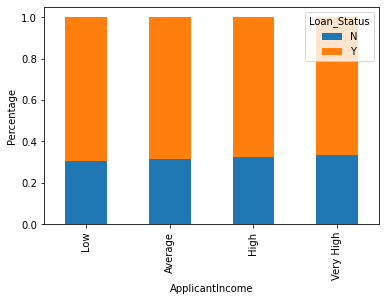

In [22]:
Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

#### From the sectioned directly above, we can infer that ApplicantIncome doesn't affect loan approval and rejection and this contradicts our earlier hypothesis where we assumed that applicants with higher income has higher chances of getting loans

In [24]:
# We will replicate similar technique for Coapplicant income
bins = [0,1500,4000,42000]
groups = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=groups)

Text(0, 0.5, 'Percentage')

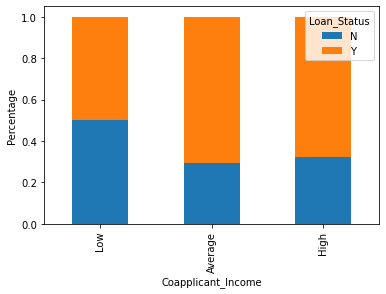

In [25]:
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Coapplicant_Income')
plt.ylabel('Percentage')

#### From the sectioned directly above, we can infer that CoapplicantIncome affect loan approval. However, most applicants do not have coapplicants so this could be deceiving, hence we will combine applicantincome and coapplicantincome and their their relationship with loan_status

In [26]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0,3000,10000,20000,81000]
groups = ['Low','Average','High','Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=groups)

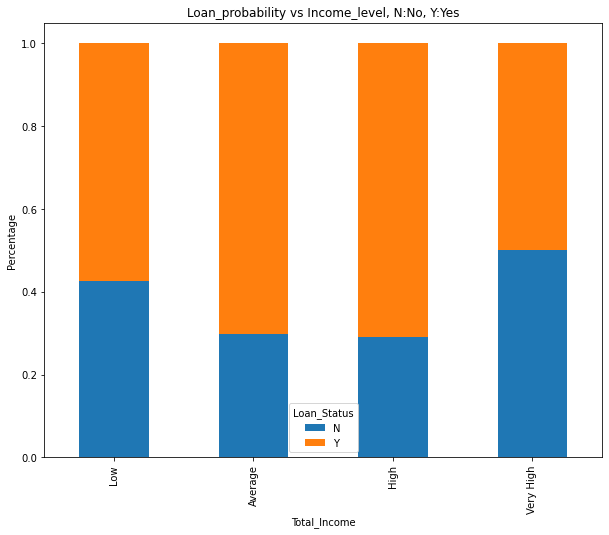

In [27]:
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(10,8))
plt.xlabel('Total_Income')
plt.ylabel('Percentage')
plt.title("Loan_probability vs Income_level, N:No, Y:Yes")
plt.savefig('Loan_approval vs Income level')

#### From the sectioned directly above, we can infer that applicants with low total incomes have lesser chances of getting loans

Text(0, 0.5, 'Percentage')

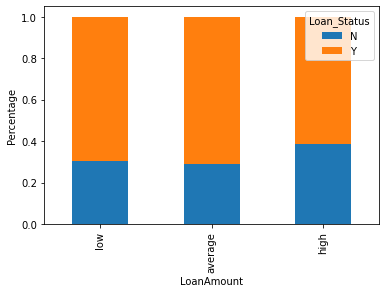

In [28]:
# Let's visualize the Loan amount variable
bins, group = [0,100,200,700], ['low','average','high']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

#### Dropping columns created earlier

In [32]:
train = train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'],axis=1)

In [34]:
# Transforming data types
train['Dependents'].replace('+3',3,inplace=True)
test['Dependents'].replace('+3',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

In [41]:
#### Correlation matrix
train.corr()['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.561678
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.021268
LoanAmount          -0.037318
CoapplicantIncome   -0.059187
Name: Loan_Status, dtype: float64

<AxesSubplot:>

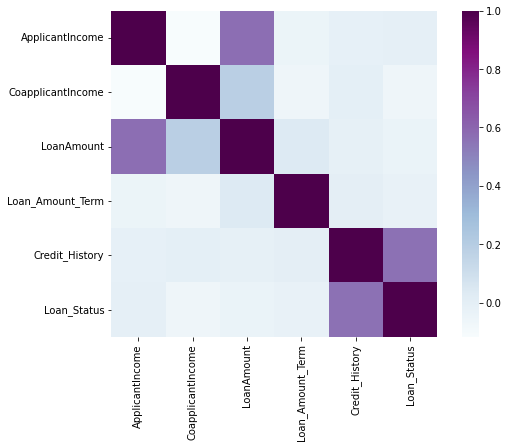

In [36]:
# Correction plots
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=1.0,square=True,cmap="BuPu")

#### We see that the most correlated variables with Loan_Status is Credit_History. Features correlated with each other; ApplicantIncome & LoanAmount and LoanAmount and CoapplicantIncome

### Data Preprocessing

In [199]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#### Dropping LoanID in the train and test dataset
training = train.drop('Loan_ID',axis=1)
testing = test.drop('Loan_ID',axis=1)

In [200]:
#### Number of nulls in each column
training.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Replacing Missing Values

In [201]:
# Function for replacing null values
def replace_missing(X_copy):  
    ### Numerical columns
    num_list = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
    inputer = SimpleImputer(missing_values=np.nan,strategy='median')
    for col in num_list:
        X_copy[col] = inputer.fit_transform(X_copy[[col]].values)
    #### Categorical columns
    cat_list = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History','Loan_Amount_Term']
    inputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
    for col in cat_list:
        X_copy[col] = inputer.fit_transform(X_copy[[col]].values)
    return X_copy

In [202]:
training = replace_missing(training)

In [203]:
#### Number of nulls in each column
training.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Replacing 'N' and 'Y' in Loan_Status with 0 and 1

In [204]:
training['Loan_Status'].replace('N',0,inplace=True)
training['Loan_Status'].replace('Y',1,inplace=True)

In [205]:
features = list(training.drop('Loan_Status',axis=1).columns)
label = 'Loan_Status'
X,y = training[features].values, training[label].values

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#### Pipeline for preprocessing and model building for Logistic Regression

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [5, 6, 7]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 8, 9, 10])])),
                ('logregressor',
                 LogisticRegression(C=10.0, solver='liblinear'))])
Confusion Matrix:
 [[ 20  23]
 [  2 109]] 

Accuracy: 0.8376623376623377
Overall Precision: 0.8257575757575758
Overall Recall: 0.9819819819819819
AUC: 0.8059920385501781


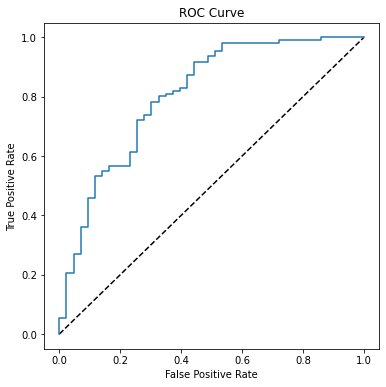

In [208]:
# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [5,6,7]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = [0,1,2,3,4,8,9,10]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
#regularization rate
reg = 0.1

# Create preprocessing and training pipeline
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])
from sklearn.impute import SimpleImputer
# fit the pipeline to train a logistic regression model on the training set
model = model_pipeline.fit(X_train, (y_train))
print (model)


# Get predictions from test data
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Model Benchmarking
'''
In this section, we'll experiment with several classification models and pick the best two-five for hyper-parameter tuning
'''

In [119]:
new = np.zeros(7)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [209]:
lr = LogisticRegression(C=1/reg, solver="liblinear")
dtr = DecisionTreeClassifier()
xgb = GradientBoostingClassifier(n_estimators=100)
rf = RandomForestClassifier(n_estimators=100)
svc = SVC(probability=True)
models = [lr,dtr,xgb,rf,svc]
def model_benchmarking(X_train,y_train,X_test,y_test):
    new = []
    result = np.zeros([5,4],dtype='object')
    for model in models:
        model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
        model_pipeline = model_pipeline.fit(X_train, (y_train))
        predictions = model_pipeline.predict(X_test)
        y_scores = model_pipeline.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
        accuracy = accuracy_score(y_test,predictions)
        precision = precision_score(y_test,predictions)
        recall = recall_score(y_test,predictions)
        auc = roc_auc_score(y_test,y_scores[:,1])
        new.append([accuracy,precision,recall,auc])
    for i in range(0,5):
        result[i,:] = new[i]
    df = pd.DataFrame(result,index=['LogisticRegression','DecisionTreeClassifier','GradientBoostingClassifier','RandomForestClassifier','SVC'], columns=['Accuracy','Precision','Recall','AUC'])
    return df
    
first_result = model_benchmarking(X_train,y_train,X_test,y_test)
first_result

,Accuracy,Precision,Recall,AUC
LogisticRegression,0.837662,0.825758,0.981982,0.805992
DecisionTreeClassifier,0.75974,0.855769,0.801802,0.726482
GradientBoostingClassifier,0.811688,0.815385,0.954955,0.772575
RandomForestClassifier,0.805195,0.829268,0.918919,0.814373
SVC,0.831169,0.819549,0.981982,0.815211


##### Deductions; It is observed that LogisticRegression and SVC had the best metrics. These models will be further explored with hyperparameter tuning and the best model will be selected for testing with test sets 